## Objetivo: Predecir si un pasajero sobrevivió o no. Clasificación binaria.

Evaluación con los modelos de ML Regresión Logística y Random Forest.

## 🚢📊 Análisis de dataset

 --- 1. Importar las librerias ---

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

--- 2. Cargar los Datos ---

In [3]:
df = pd.read_csv("titanic.csv")
print("Primeras filas del dataset")
df.head()

Primeras filas del dataset


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


--- 3. Visualizar los tipos de datos ---

In [4]:
# Verificar los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


--- 4. Preprocesamiento de datos ---

In [5]:
# Verificar valores nulos por columna
print("Valores nulos por columna")
df.isnull().sum()

Valores nulos por columna


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
# Eliminar columnas innecesarias para el análisis. Variable Objetivo: Survived (Sobreviviente). Parcialmente vemos que "Name" (Nombre) no aporta al análisis se prodede a eliminarla.
# --- OPCIONAL --- Podemos hacer una La correlación de Spearman para identificar qué variables tienen una relación monótona con Survived (Sobreviviente) y cuáles se pueden eliminar si su correlación es baja.
# Renombrar las columnas
df.columns = ["Sobreviviente", "Clase Pasajero","Nombre","Género","Edad", "Hermanos a bordo", "Padres/Hijos a bordo", "Tarifa"]
df.head()

,Sobreviviente,Clase Pasajero,Nombre,Género,Edad,Hermanos a bordo,Padres/Hijos a bordo,Tarifa
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
# Eliminar "Nombre"
Columna_a_eliminar = ["Nombre"] 
df.drop(Columna_a_eliminar,axis="columns",inplace=True)
df.head()

,Sobreviviente,Clase Pasajero,Género,Edad,Hermanos a bordo,Padres/Hijos a bordo,Tarifa
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
# Pasar "Género" a valores binarios
df = pd.get_dummies(df,columns=["Género"], drop_first=True).astype(int)
df.head()

,Sobreviviente,Clase Pasajero,Edad,Hermanos a bordo,Padres/Hijos a bordo,Tarifa,Género_male
0,0,3,22,1,0,7,1
1,1,1,38,1,0,71,0
2,1,3,26,0,0,7,0
3,1,1,35,1,0,53,0
4,0,3,35,0,0,8,1


In [9]:
# Cambiar el nombre de la columna "Genero_male" a su nombre original "Genero"
df.rename(columns={"Género_male":"Género"}, inplace=True)
df.head()

,Sobreviviente,Clase Pasajero,Edad,Hermanos a bordo,Padres/Hijos a bordo,Tarifa,Género
0,0,3,22,1,0,7,1
1,1,1,38,1,0,71,0
2,1,3,26,0,0,7,0
3,1,1,35,1,0,53,0
4,0,3,35,0,0,8,1


Sobreviviente            1.00
Tarifa                   0.32
Padres/Hijos a bordo     0.14
Hermanos a bordo         0.09
Edad                    -0.03
Clase Pasajero          -0.34
Género                  -0.54
Name: Sobreviviente, dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4956\2503079029.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_con_Sobreviviente.values, y=corr_con_Sobreviviente.index, palette="viridis")


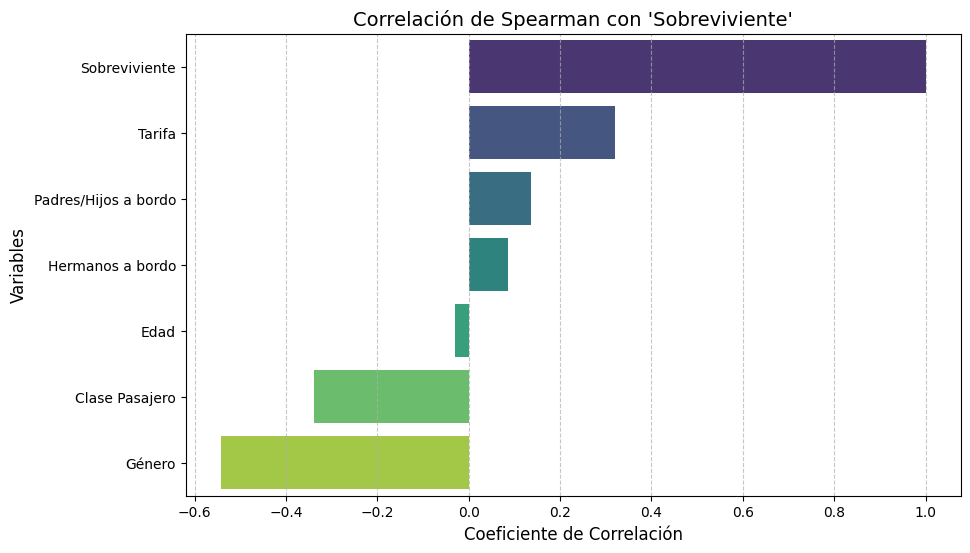

In [10]:
# Calcular matriz de correlación Spearman
corr_spearman = df.corr(method='spearman')
# Extraer la correlación con 'Sobreviviente' y ordenarla
corr_con_Sobreviviente = corr_spearman['Sobreviviente'].sort_values(ascending=False)
# Mostrar correlaciones
print(corr_con_Sobreviviente.apply(lambda x: f"{x:.2f}"))
# Visualización con gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=corr_con_Sobreviviente.values, y=corr_con_Sobreviviente.index, palette="viridis")
plt.title("Correlación de Spearman con 'Sobreviviente'", fontsize=14)
plt.xlabel("Coeficiente de Correlación", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Mostrar gráfico
plt.show()

--- conclusión del pre-procesamiento ---

 Como la variable "Clase Pasajero" representa indirectamente a la variable "Tarifa", puede haber redundancia en la evaluación por eso la eliminamos.

🔹 Género → -0.54: Es la correlación más fuerte, lo que indica que el género tuvo un impacto muy significativo en la supervivencia Probablemente porque mujeres y niños fueron prioridad en el rescate.

🔹 Edad → -0.03: Relación prácticamente nula, por lo que la edad no parece influir mucho en la probabilidad de sobrevivir.

In [11]:
# Columnas a eliminar: "Tarifa" y "Edad"
df = df.drop(columns=['Edad', 'Tarifa'])
df.head()

,Sobreviviente,Clase Pasajero,Hermanos a bordo,Padres/Hijos a bordo,Género
0,0,3,1,0,1
1,1,1,1,0,0
2,1,3,0,0,0
3,1,1,1,0,0
4,0,3,0,0,1


 ## 🚢🎯 Modelo de Regresión Logistica

--- 1. Separar Variable Objetivo y Características ---

In [12]:
X= df.drop(columns=['Sobreviviente'])
y= df['Sobreviviente']

--- 2. Dividir el Dataset en datos de Entrenamiento (70%) y Prueba (30%) ---

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

--- 3. Entrenar el Modelo de Regresión Logística ---

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

--- 4. Predicciones ---

In [15]:
y_pred = model.predict(X_test)

--- 5. Evaluar el Modelo ---

In [16]:
print("Accuracy (Exactitud / Presición Global):", round(accuracy_score(y_test, y_pred), 2))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy (Exactitud / Presición Global): 0.76
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       166
           1       0.75      0.55      0.64       101

    accuracy                           0.76       267
   macro avg       0.76      0.72      0.73       267
weighted avg       0.76      0.76      0.75       267



📌 Análisis de Métricas

1️⃣ Accuracy (Exactitud): El modelo tiene una precisión global del 76%, lo que significa que el 76% de las predicciones fueron correctas en el conjunto de prueba.

2️⃣ Precisión (Precisión)
Clase 0 (No sobrevivió) → 0.77: De todas las veces que el modelo predijo "No sobrevivió", el 77% fueron correctas.
Clase 1 (Sí sobrevivió) → 0.75: De todas las veces que el modelo predijo "Sí sobrevivió", el 75% fueron correctas.

3️⃣ Recall (Sensibilidad o exhaustividad)
Clase 0 → 0.89: El modelo encontró correctamente el 89% de los pasajeros que realmente no sobrevivieron.
Clase 1 → 0.55: Solo identificó correctamente el 55% de los sobrevivientes, lo cual indica que el modelo tiene dificultades para encontrar todos los casos positivos.

4️⃣ F1-Score (Balance entre precisión y recall)
Clase 0 → 0.82
Clase 1 → 0.64

La clase 0 tiene un mejor rendimiento que la clase 1, lo que sugiere que el modelo es más preciso al identificar a los pasajeros que NO sobrevivieron que a los que sí sobrevivieron.

5️⃣ Macro Avg vs. Weighted Avg
Macro Avg → Calcula el promedio simple de precisión, recall y f1-score entre las clases.
Weighted Avg → Calcula el promedio ponderado según la cantidad de ejemplos en cada clase.
Aquí, ambos promedios están cercanos, lo que significa que las clases están relativamente equilibradas en términos de representación.

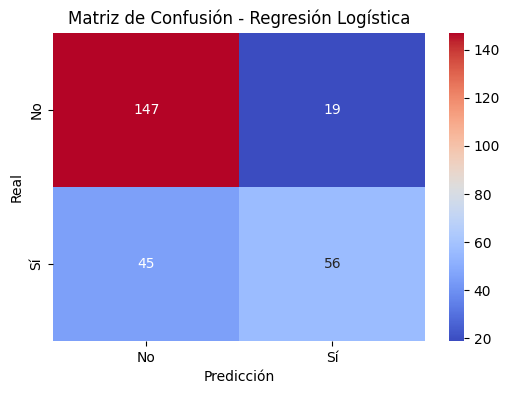

In [17]:
# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

📌 Resultados del modelo:

147 casos TN (True Negative – Verdadero Negativo) → El modelo predijo correctamente que no sobrevivieron.

19 casos  FP (False Positive – Falso Positivo) → Predijo erróneamente que sobrevivieron cuando en realidad no lo hicieron.

45 casos  FN (False Negative – Falso Negativo) → Predijo erróneamente que no sobrevivieron, pero en realidad sí lo hicieron.

56 casos  TP (True Positive – Verdadero Positivo) → El modelo acertó al identificar a los que sobrevivieron.

📊 ¿Qué significa esto?

 🔹 Alta cantidad de FN (45 casos) → El modelo tiene dificultades para detectar sobrevivientes, lo que indica que el recall para la clase 1 es bajo.

 🔹 Alta cantidad de TN (147 casos) → Es más preciso al identificar quienes no sobrevivieron.
 
 🔹 El balance entre FP y FN sugiere que el modelo podría beneficiarse de un ajuste en los umbrales de clasificación o un balanceo de clases.

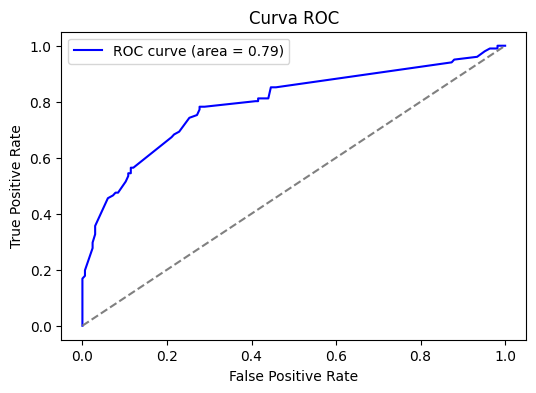

In [18]:
# Curva ROC
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

📌 Interpretación de tu curva ROC:

🔹 Área bajo la curva (AUC = 0.79): Significa que el modelo tiene un buen desempeño, ya que un AUC cercano a 1.0 indica una excelente discriminación entre clases, mientras que un valor cercano a 0.5 sugiere que el modelo no es mejor que el azar.

Con 0.79, el modelo tiene buena capacidad de clasificación, aunque hay margen de mejora.

🔹 Curva ROC (True Positive Rate vs. False Positive Rate): La curva azul muestra cómo cambia el TPR (tasa de verdaderos positivos) en función del FPR (tasa de falsos positivos).

Un modelo ideal se acercaría más al esquina superior izquierda (TPR alto y FPR bajo).

--- 6. Datos de prueba para predecir con el modelo de regresión logística ---

In [19]:
# Recordemos el orden de las columnas del df
df.head()

,Sobreviviente,Clase Pasajero,Hermanos a bordo,Padres/Hijos a bordo,Género
0,0,3,1,0,1
1,1,1,1,0,0
2,1,3,0,0,0
3,1,1,1,0,0
4,0,3,0,0,1


In [20]:
# Hagamos predicciones con 3 nuevos casos 
# Definir 3 nuevos casos 
nuevos_casos = pd.DataFrame({
    "Clase Pasajero": [1, 3, 2], "Hermanos a bordo": [1, 0, 2], "Padres/Hijos a bordo": [0, 1, 0], "Género": [1, 0, 1] 
})
nuevos_casos.head()

,Clase Pasajero,Hermanos a bordo,Padres/Hijos a bordo,Género
0,1,1,0,1
1,3,0,1,0
2,2,2,0,1


In [21]:
# Hacer predicciones
predicciones = model.predict(nuevos_casos)
# Mostrar resultados
print("Predicciones para los nuevos casos:")
for i, pred in enumerate(predicciones):
    print(f"Caso {i+1}: {'Sobrevivió' if pred == 1 else 'No sobrevivió'}")#

Predicciones para los nuevos casos:
Caso 1: No sobrevivió
Caso 2: Sobrevivió
Caso 3: No sobrevivió


----------  Veamos como está el balanceo de las clases ----------


Distribución de la variable 'Sobreviviente':
Sobreviviente
0    545
1    342
Name: count, dtype: int64

Porcentaje por clase:
Sobreviviente
0    61.44 %
1    38.56 %
Name: proportion, dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4956\3040521108.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=balance_clases.index, y=balance_clases.values, palette="viridis")


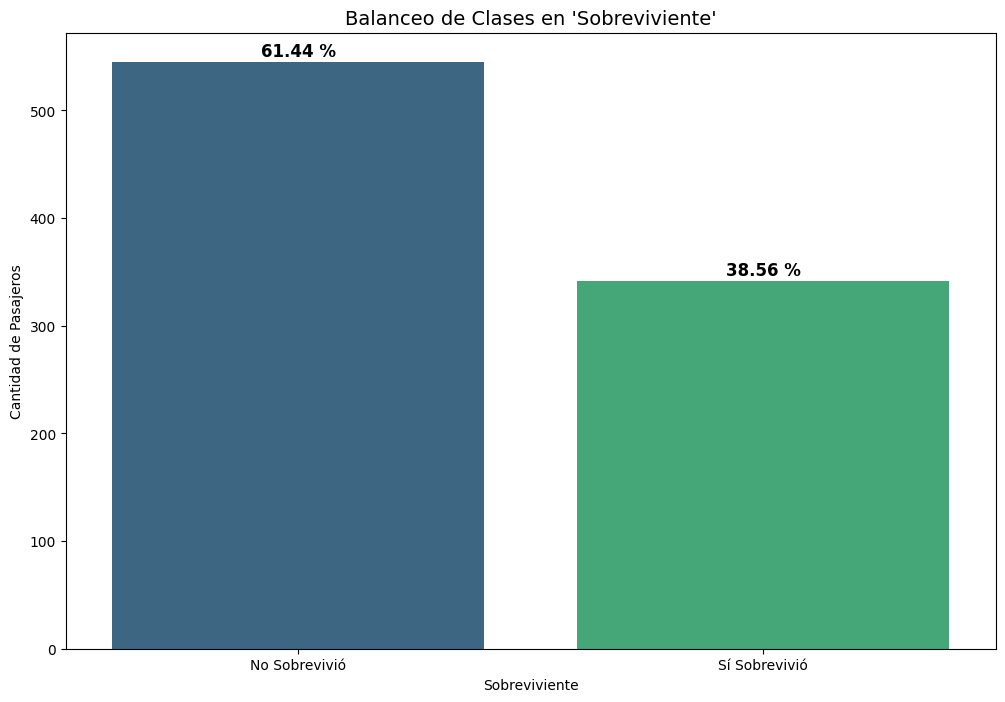

In [22]:
# Calcular el conteo y porcentaje de clases
balance_clases = df['Sobreviviente'].value_counts()
porcentaje_clases = df['Sobreviviente'].value_counts(normalize=True) * 100

# Mostrar distribución
print("\nDistribución de la variable 'Sobreviviente':")
print(balance_clases)
print("\nPorcentaje por clase:")
print(porcentaje_clases.round(2).astype(str) + " %") 

# Crear gráfico de barras
plt.figure(figsize=(12,8))
ax = sns.barplot(x=balance_clases.index, y=balance_clases.values, palette="viridis")

# Agregar etiquetas
for i, valor in enumerate(balance_clases.values):
    porcentaje = porcentaje_clases.iloc[i]
    ax.text(i, valor + 5, f"{porcentaje:.2f} %", ha='center', fontsize=12, fontweight='bold', color='black')

# Personalizar el gráfico
plt.xticks(ticks=[0,1], labels=["No Sobrevivió", "Sí Sobrevivió"])
plt.ylabel("Cantidad de Pasajeros")
plt.title("Balanceo de Clases en 'Sobreviviente'", fontsize=14)

# Mostrar el gráfico
plt.show()


Se puede concluir tomando en cuenta un umbral de 80%, que las clases para la variable objetivo "Sobreviviente" está balanceada. 

## 🚢🌳 Random Forest

--- 1. Importar librerías necesarias para aplicar correctamente el modelo de random forest ---

In [23]:
from sklearn.ensemble import RandomForestClassifier

--- 2. Entrenar el modelo Random Forest ---

In [24]:
model_rf = RandomForestClassifier(n_estimators=60, random_state=42) #probamos con n_estaimators = 100 ,40, 50 y 60
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

--- 3. Predicciones ---

In [25]:
y_pred_rf = model_rf.predict(X_test)

--- 4. Evaluar el modelo ---

In [26]:
# Exactitud y reporte de clasificación
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.75
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       166
           1       0.75      0.50      0.60       101

    accuracy                           0.75       267
   macro avg       0.75      0.70      0.71       267
weighted avg       0.75      0.75      0.74       267



La precisión general o exactitud del modelo con n_estimators=100 es de 74%. Ajustar n_estimators a 40, 50 o 60 en Random Forest parece mejorar la precisión del modelo a 75%. Sin embargo, el siguiente paso será ajustar hiperparámetros para mejorar la exactitud.

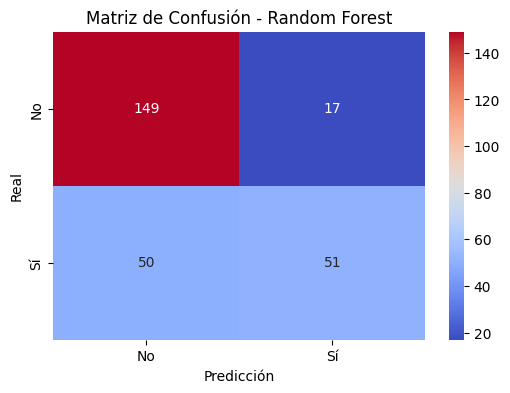

In [28]:
# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

📌 Interpretación de la matriz de confusión - Random Forest:

🔹 True Negative (TN) → 149: El modelo clasificó correctamente 149 pasajeros que NO sobrevivieron.

🔹 False Positive (FP) → 17: El modelo predijo que 17 pasajeros sobrevivieron, pero en realidad NO lo hicieron (error tipo I).

🔹 False Negative (FN) → 50: 50 sobrevivientes fueron clasificados erróneamente como "No sobrevivió" (error tipo II). Esto indica que el modelo aún tiene dificultades para identificar ciertos casos de supervivientes.

🔹 True Positive (TP) → 51: 51 sobrevivientes fueron clasificados correctamente por el modelo.

Conclusión:

✅ La cantidad de True Negatives es alta (149 casos), lo que indica que el modelo es muy bueno identificando pasajeros que no sobrevivieron.

✅ El recall en la clase 1 (sobrevivientes) aún puede mejorar, ya que hay 50 falsos negativos.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4956\612230089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


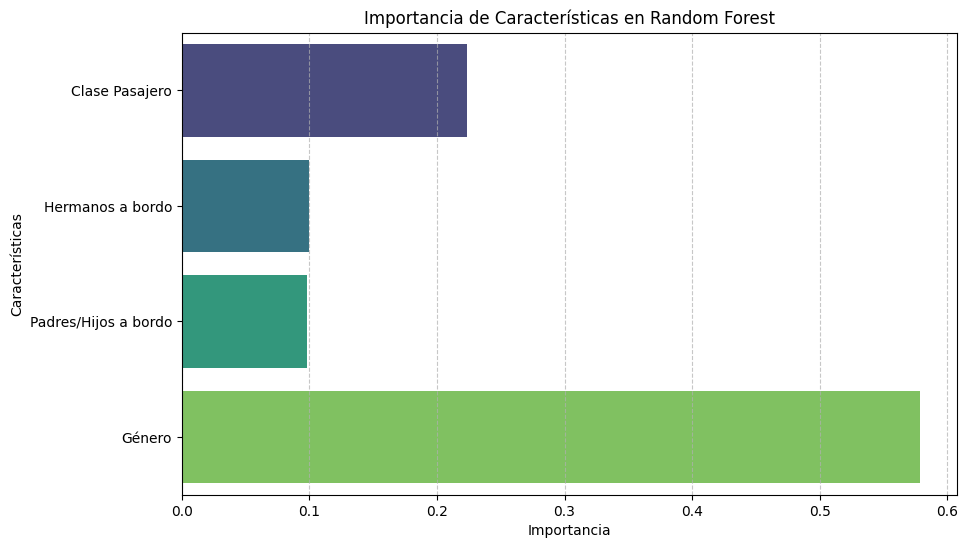

In [29]:

# Importancia de característicaszar la Importancia de Variables
importances = model_rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Importancia de Características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Predominan la svariables Gènero y Clase Pasajero como las más importantes para la predicción.

--- 5. Búsqueda de hiperparámetros más óptimos ---

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo base
model_rf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [40, 60, 100],  # Cantidad de árboles
    'max_depth': [None, 5, 10],  # Profundidad de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'max_features': ['sqrt', 'log2']  # Cantidad de características usadas por cada árbol
}

# Realizar la búsqueda con validación cruzada
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor Accuracy obtenido (Exactitud):", round(grid_search.best_score_, 2))

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Mejores hiperparámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 40}
Mejor Accuracy obtenido (Exactitud): 0.82


RandomForestClassifier(max_depth=5, n_estimators=40, random_state=42)

📌 Resumen de los mejores hiperparámetros:

✅ max_depth = 5 → Limita la profundidad del árbol, reduciendo sobreajuste.

✅ max_features = sqrt → Usa la raíz cuadrada del total de características en cada división, mejorando la diversidad de árboles.

✅ min_samples_split = 2 → Permite que los nodos se dividan con al menos 2 muestras, evitando fragmentaciones innecesarias.

✅ n_estimators = 40 → Aumentar árboles ayudó a mejorar la estabilidad del modelo sin aumentar demasiado la complejidad.

--- 6. Casos de prueba ---

In [32]:
# Usamos los mismos datos de prueba de regresión logística
nuevos_casos.head()

,Clase Pasajero,Hermanos a bordo,Padres/Hijos a bordo,Género
0,1,1,0,1
1,3,0,1,0
2,2,2,0,1


In [34]:
# Hacer predicciones con el modelo optimizado
predicciones = best_model.predict(nuevos_casos)

# Mostrar resultados
print("Predicciones para los nuevos casos:")
for i, pred in enumerate(predicciones):
    print(f"Caso {i+1}: {'Sobrevivió' if pred == 1 else 'No sobrevivió'}")

Predicciones para los nuevos casos:
Caso 1: No sobrevivió
Caso 2: Sobrevivió
Caso 3: No sobrevivió


🔍 Conclusión

✅ Random Forest tuvo mayor precisión (82%) vs. un 76% de presición en el modelo de regresión logística, lo que indica que el Random Forest es mejor capturando patrones en los datos.

✅ Regresión Logística es más fácil de interpretar, útil para entender cómo cada variable afecta la probabilidad de supervivencia.

✅ Random Forest maneja mejor relaciones no lineales, lo que es clave en datos con múltiples interacciones.

✅ La Regresión Logística es más rápida, ideal cuando se necesita un modelo ligero y explicativo.

✅ La optimización de hiperparámetros mejoró significativamente Random Forest, mostrando que este modelo puede adaptarse mejor a los datos.

💡 ¿Cuál elegir?

Para una mayor explicabilidad → Regresión Logística es una mejor opción.

Para una mayor precisión y manejo de datos complejos → Random Forest es superior en este caso.